## Imports

In [259]:
# Imports
import matplotlib.pyplot as plt
import numpy as np
import pickle
import seaborn as sns
import os
import pandas as pd


In [260]:
# Plots configuration.

from tueplots import axes as tue_axes
from tueplots import cycler as tue_cycler
from tueplots.constants import markers as tue_markers
from tueplots.constants.color import palettes as tue_palettes

plt.rcParams.update({"figure.dpi": 80})
plt.rcParams.update(tue_axes.spines(left=True, right=False, top=False, bottom=True))
plt.rcParams.update(tue_axes.grid())
plt.rcParams.update(tue_cycler.cycler(color=tue_palettes.high_contrast))


## Load the data

In [261]:
# Define the path where to save the results.
res_path = os.path.join(
    "/users/csb/huizing/Documents/PhD/Code/",
    "mowgli_reproducibility/data/10X_PBMC_10k/scores_mofa.pkl",
)

# Load the results from the pickle file.
with open(res_path, "rb") as f:
    scores_dict = pickle.load(f)

In [262]:
# Turn the scores into a dataframe.
scores_df = pd.DataFrame(scores_dict).T

In [263]:
# Print the head of the dataframe.
scores_df.head()

,Silhouette score,Purity scores,k range,ARIs,res_range,ARIs after denoising
pbmc_mofa_15,0.358907,"[0.9225321888412559, 0.9212982832618382, 0.921...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[0.7347246442560976, 0.7871058117845379, 0.768...","[0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6,...","[0.7857166404920114, 0.7801271017987409, 0.704..."
pbmc_mofa_30,0.305522,"[0.9241416309013418, 0.9208154506438104, 0.919...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[0.6296626250407192, 0.7937682452217845, 0.743...","[0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6,...","[0.6752499081826121, 0.7898834081858246, 0.747..."
pbmc_mofa_50,0.298408,"[0.921030042918509, 0.9203862660944547, 0.9195...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[0.6562768696943939, 0.7795193974390501, 0.801...","[0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6,...","[0.6735824555769804, 0.797807001921298, 0.7579..."


In [264]:
# Add some columns.
scores_df["Dataset"] = "10X PBMC"
scores_df["Method"] = "MOFA+"
scores_df["Latent dimension"] = [15, 30, 50]

## Supplementary figure 1 -- MOFA depending on latent dimension

In [265]:
# Make a new dataframe with individual ARI scores for each resolution.

ari_res = []  # Initialize the list that will be turned into a dataframe.

# Iterate over experiments.
for xp_name in scores_df.index:

    # Iterate over resolutions.
    for i, res in enumerate(scores_df.loc[xp_name, "res_range"]):

        # Add the ARI to the list.
        ari_res.append(
            {
                "xp_name": xp_name,
                "Dataset": scores_df.loc[xp_name, "Dataset"],
                "Latent dimension": str(scores_df.loc[xp_name, "Latent dimension"]),
                "Resolution": res,
                "ARI": scores_df.loc[xp_name, "ARIs"][i],
                "ARI jaccard": scores_df.loc[xp_name, "ARIs after denoising"][i],
            }
        )

# Turn the list into a dataframe.
ari_res = pd.DataFrame(ari_res)


In [266]:
# Make a new dataframe with individual purity scores depending on k.

purity_res = [] # Initialize the list that will be turned into a dataframe.

# Iterate over experiments.
for xp_name in scores_df.index:

    # Iterate over k nearest neighbours.
    for i, k in enumerate(scores_df.loc[xp_name, "k range"]):

        # Add the purity score to the list.
        purity_res.append({
            "xp_name": xp_name,
            "Dataset": scores_df.loc[xp_name, "Dataset"],
            "Latent dimension": str(scores_df.loc[xp_name, "Latent dimension"]),
            "k": k,
            "Purity score": scores_df.loc[xp_name, "Purity scores"][i]
        })

# Turn the list into a dataframe.
purity_res = pd.DataFrame(purity_res)

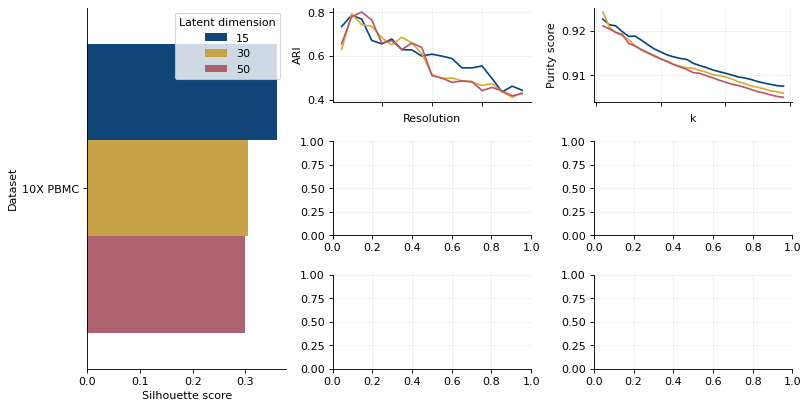

In [267]:
# Define the subplots.
fig = plt.figure(constrained_layout=True, figsize=(10, 5))
axes = fig.subplot_mosaic(
    """
    ABC
    ADE
    AFG
    """
)

# Visualize the silhouette score as a bar plot.
sns.barplot(
    data=scores_df,
    y="Dataset",
    x="Silhouette score",
    hue="Latent dimension",
    ax=axes["A"],
)

# Visualize the ARI as a line plot.
sns.lineplot(
    data=ari_res, x="Resolution", y="ARI", hue="Latent dimension", ax=axes["B"]
)
axes["B"].set_xticklabels([])
axes["B"].get_legend().remove()

# Visualize the purity score as a line plot.
sns.lineplot(
    data=purity_res, x="k", y="Purity score", hue="Latent dimension", ax=axes["C"]
)
axes["C"].set_xticklabels([])
axes["C"].get_legend().remove()

axes["B"].grid()
axes["C"].grid()
axes["D"].grid()
axes["E"].grid()
axes["F"].grid()
axes["G"].grid()

## Figure 1 -- All methods

In [268]:
# Subset scores_df to only include latent dimension 30.
scores_df = scores_df.loc[scores_df["Latent dimension"] == 30]

In [269]:
# Make a new dataframe with individual ARI scores for each resolution.

ari_res = []  # Initialize the list that will be turned into a dataframe.

# Iterate over experiments.
for xp_name in scores_df.index:

    # Iterate over resolutions.
    for i, res in enumerate(scores_df.loc[xp_name, "res_range"]):

        # Add the ARI to the list.
        ari_res.append(
            {
                "xp_name": xp_name,
                "Dataset": scores_df.loc[xp_name, "Dataset"],
                "Method": scores_df.loc[xp_name, "Method"],
                "Latent dimension": str(scores_df.loc[xp_name, "Latent dimension"]),
                "Resolution": res,
                "ARI": scores_df.loc[xp_name, "ARIs"][i],
                "ARI jaccard": scores_df.loc[xp_name, "ARIs after denoising"][i],
            }
        )

# Turn the list into a dataframe.
ari_res = pd.DataFrame(ari_res)


In [270]:
# Make a new dataframe with individual purity scores depending on k.

purity_res = [] # Initialize the list that will be turned into a dataframe.

# Iterate over experiments.
for xp_name in scores_df.index:

    # Iterate over k nearest neighbours.
    for i, k in enumerate(scores_df.loc[xp_name, "k range"]):

        # Add the purity score to the list.
        purity_res.append({
            "xp_name": xp_name,
            "Dataset": scores_df.loc[xp_name, "Dataset"],
            "Method": scores_df.loc[xp_name, "Method"],
            "Latent dimension": str(scores_df.loc[xp_name, "Latent dimension"]),
            "k": k,
            "Purity score": scores_df.loc[xp_name, "Purity scores"][i]
        })

# Turn the list into a dataframe.
purity_res = pd.DataFrame(purity_res)

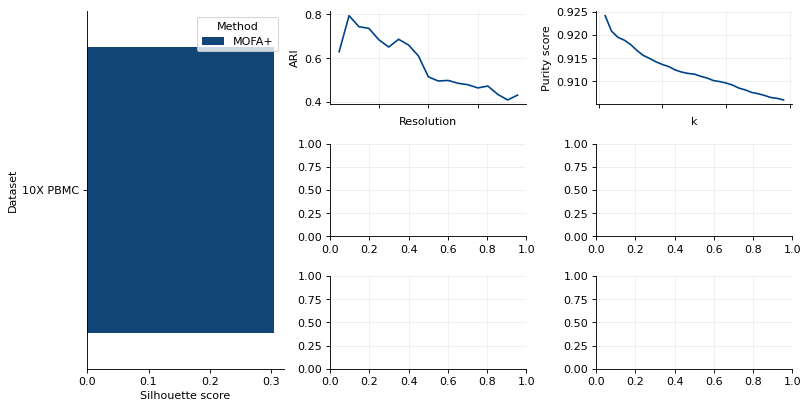

In [271]:
# Define the subplots.
fig = plt.figure(constrained_layout=True, figsize=(10, 5))
axes = fig.subplot_mosaic(
    """
    ABC
    ADE
    AFG
    """
)

# Visualize the silhouette score as a bar plot.
sns.barplot(
    data=scores_df,
    y="Dataset",
    x="Silhouette score",
    hue="Method",
    ax=axes["A"],
)

# Visualize the ARI as a line plot.
sns.lineplot(
    data=ari_res, x="Resolution", y="ARI", hue="Method", ax=axes["B"]
)
axes["B"].set_xticklabels([])
axes["B"].get_legend().remove()

# Visualize the purity score as a line plot.
sns.lineplot(
    data=purity_res, x="k", y="Purity score", hue="Method", ax=axes["C"]
)
axes["C"].set_xticklabels([])
axes["C"].get_legend().remove()

axes["B"].grid()
axes["C"].grid()
axes["D"].grid()
axes["E"].grid()
axes["F"].grid()
axes["G"].grid()